# PROYECTO MODELOS AVANZADOS 1 - GRUPO 5

## Integrantes:

* Denis Leonardo Jaimes Campos | Código: 202027884
* Esteban López Zúñiga | Código: 200914313
* Oscar Hernando Ayala Nino | Código: 201920024
* Sebastián Camilo Camargo Bello | Código: 201014774
* Sindy Lorena Murcia Florez | Código: 202028060

# Caso de estudio: Predicción precio de vehículos

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import zipfile
import os

In [2]:
url="https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/dataTrain_carListings.csv"
data = pd.read_csv(url)
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [3]:
data.shape

(500000, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

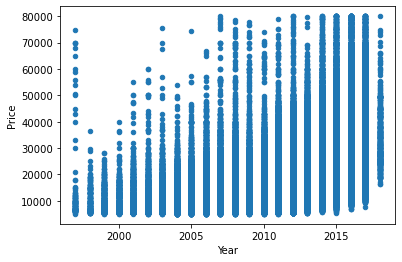

In [6]:
data.plot(kind='scatter', y='Price', x='Year');

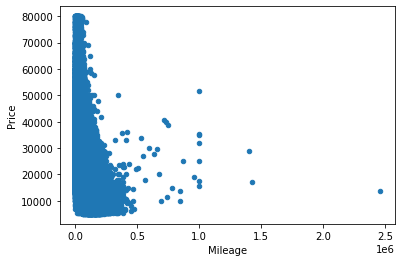

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage');

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# 1. Exercise P2.1 (50%)

## 1.1. Exploración de los datos :

La exploración de los datos se realizó identificando las características y comportamiento cada una de las variables que podría ser parte del modelo de regresión, el cual busca predecir el precio de un vehículo (Price) de acuerdo con los datos de Marca (Make), Modleo (Model), Año (Year) y kilometráje (Mileage).

En este sentido, se realizaron los siguientes análisis:


* **Variable regresora Make**: corresponde a la marca del vehículo, se tienen 38 marcas obteniendo que las marcas con mayor presencia corresponden a Ford, Chevrolet, Toyota, Honda y Jeep que representan el 56.18% de las observaciones del dataframe. El gráfico de boxplot por marca refleja una importante variación de los precios entre marcas.

In [9]:
# Para la variable make:
make = data.Make.value_counts().to_frame()
make['cumsum'] = make.Make.cumsum()
make['cont_pct'] = make['Make'] / 500000
make['pct']= make['cumsum'] / 500000
len(make['Make'])

38

In [10]:
make.head(10)

,Make,cumsum,cont_pct,pct
Ford,78627,78627,0.157254,0.157254
Chevrolet,72900,151527,0.145800,0.303054
Toyota,57485,209012,0.114970,0.418024
Honda,41490,250502,0.082980,0.501004
Jeep,30413,280915,0.060826,0.561830
GMC,25963,306878,0.051926,0.613756
Kia,20347,327225,0.040694,0.654450
Dodge,20178,347403,0.040356,0.694806
Hyundai,18856,366259,0.037712,0.732518
Lexus,17127,383386,0.034254,0.766772


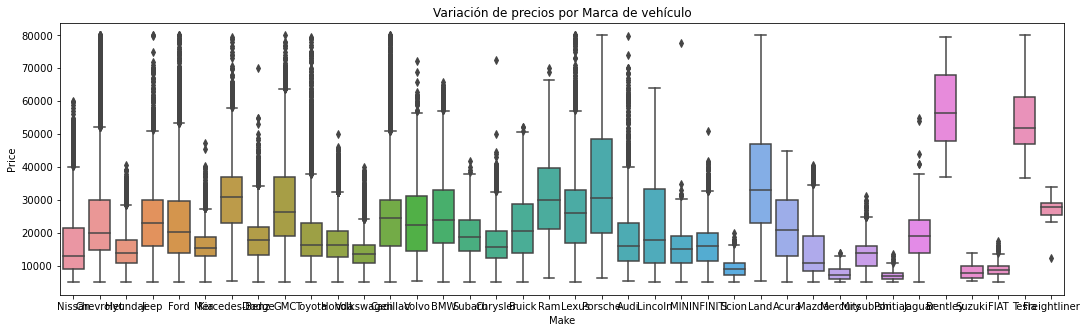

In [11]:
plt.figure(figsize=(18,5))
sn.boxplot(data=data[['Price', 'Make']],  x='Make', y='Price')
plt.title('Variación de precios por Marca de vehículo');

Se observa que existe una gran variación del precio dependiendo de la marca del vehículo, razón por la cual se procederá a hacer un agrupamiento de la variable usando rangos por percentiles de acuerdo con su valor promedio de precio.

* **Variable regresora Model**: corresponde al modelo del vehículo, se tienen 525 modelos de vehiculo diferentes cada uno con frecuencia relativa muy pequeña.

In [12]:
# Para la variable modelo:
modelos = data.Model.value_counts().to_frame()
modelos['cumsum'] = modelos.Model.cumsum()
modelos['cont_pct'] = modelos['Model'] / 500000
modelos['pct']= modelos['cumsum'] / 500000
len(modelos['Model'])

525

In [13]:
modelos

,Model,cumsum,cont_pct,pct
Silverado,22562,22562,0.045124,0.045124
Grand,15382,37944,0.030764,0.075888
Sierra,10423,48367,0.020846,0.096734
Accord,9145,57512,0.018290,0.115024
F-1504WD,8379,65891,0.016758,0.131782
...,...,...,...,...
Element2WD,69,499735,0.000138,0.999470
MuranoS,68,499803,0.000136,0.999606
RX-84dr,66,499869,0.000132,0.999738
PathfinderSE,66,499935,0.000132,0.999870


In [15]:
# Variación del precio promedio por cada modelo:

data.groupby(by='Model')['Price'].describe().sort_values(by='mean', ascending=False)['mean']

Model
Continental            57455.095890
Model                  55040.780749
CorvetteConvertible    54578.548077
XC90T6                 53176.666667
E-ClassE               52769.452542
                           ...     
Durango4dr              6853.848739
Cobalt4dr               6745.084416
Cobalt2dr               6664.214286
Escape4dr               6633.011364
PT                      6248.298851
Name: mean, Length: 525, dtype: float64

In [16]:
data.groupby(by='Model')['Price'].describe().sort_values(by='mean', ascending=False)['mean'].describe()

count      525.000000
mean     19552.526359
std       9425.334884
min       6248.298851
25%      12108.394958
50%      17364.185950
75%      25028.864286
max      57455.095890
Name: mean, dtype: float64

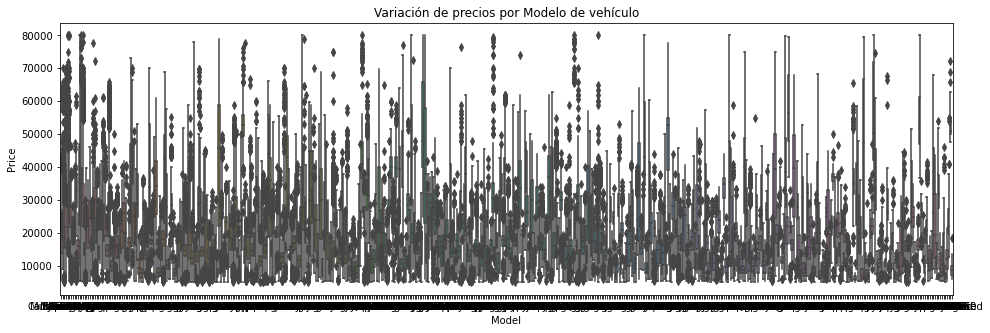

In [21]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Model']],  x='Model', y='Price');
plt.title('Variación de precios por Modelo de vehículo');

Al presentarse una granularidad tan alta por el alto número de modelos (525) y al entender que cada modelo únicamente aparece relacionado por una marca de vehículo (relación Modelo-Marca es 1:1), se decidió **NO** incluir esta variable como regresora en el modelo predictivo.

* **Variable regresora State**: corresponde al Estado donde se encuentra matriculado el vehículo, se tienen 51 estados posibles.

In [17]:
# Para la variable estado:
estados = data.State.value_counts().to_frame()
estados['cumsum'] = estados.State.cumsum()
estados['pct']= estados['cumsum'] / 500000
estados.reset_index(inplace=True)
len(estados['State'])

51

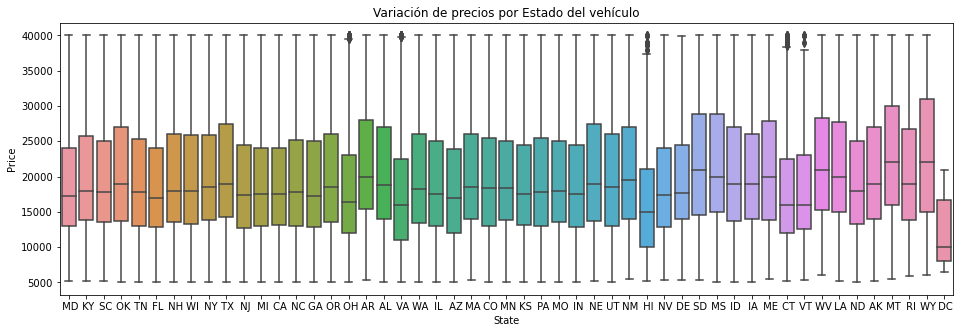

In [22]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'State']][data['Price']<40000],  x='State', y='Price');
plt.title('Variación de precios por Estado del vehículo');

Se observa que existe una variación del Precio para algunos estados. Esto, sumado a que son varios estados (51), es un buen indicativo para hacer un agrupamiento de la variable por percentiles de acuerdo con el promedio del precio.

* **Variable regresora Year**: corresponde al año del vehiculo, se tienen registros de vehiculos desde 1997 hasta 2018

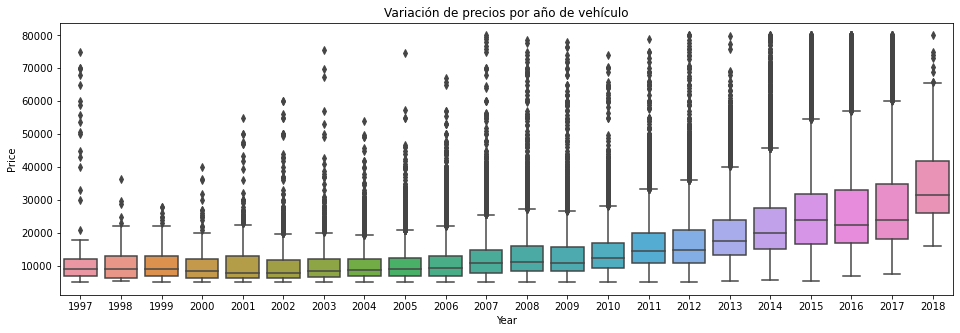

In [23]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Year']],  x='Year', y='Price');
plt.title('Variación de precios por año de vehículo');

Se observa claramente que existe una tendencia de aumento en el precio promedio a medida que van aumentando el año del modelo del vehículo (lo cual es lo esperado en una situación real). Dado que es una variable numérica, no se requiere hacer agrupamiento.

* **Variable regresora Mileage**: corresponde a las millas recorridas por los vehículos. El diagrama de dispersión muestra que los vehículos que registran los mayores precios, entre 60.000 y 80.000 USD no presentan Mileage mayores a 100.000.

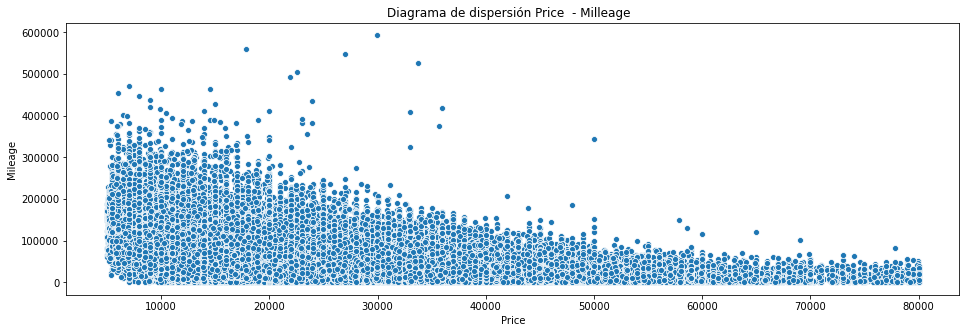

In [25]:
plt.figure(figsize=(16,5))
sn.scatterplot(data=data[data['Mileage']<600000][['Mileage', 'Price']], y='Mileage', x='Price');
plt.title('Diagrama de dispersión Price  - Milleage  ');

Se observa una tendencia de aumento en el precio a medida que disminuye el kilomatraje del vehículo. Esto es lo esperado de acuerdo con una situación real (entre más kilometraje tenga un vehículo, se espera que su precio disminuya). 

* **Variable a predecir Price**: corresponde al precio de venta de los vehículos usados, a continuación se grafica la distribución de esta variable:

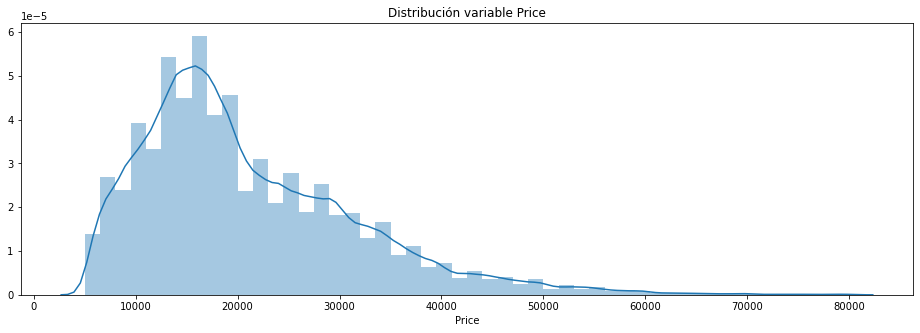

In [27]:
plt.figure(figsize=(16,5))
sn.distplot(data.Price);
plt.title('Distribución variable Price');

Se observa que la distribución del precio presenta outliers en valores que están por encima de 8000. Se opta por no hacer ninguna transformación ya que son varios los registros que presentan valores altos.

* **Creación nuevas variables a partir de las variables make y State**

Teniendo en cuenta las características de las variables, con el fin de disminuir las categorías de estas, se crean nuevas variables que indican, dados los cuantiles de la distribución de precios, en que partición se ubica la respectiva marca o el Estado. Para la variable Make se utilizaron 7 particiones de la distribución, mientras que para la variable State 4.

In [28]:
# Binning Make:

marcas = data.groupby(by='Make')['Price'].describe().sort_values(by='mean', ascending=False)#.reset_index(inplace=True)
marcas.reset_index(inplace=True)
marcas['quartil_make'] = pd.cut(marcas['mean'], bins=[0,marcas['mean'].quantile(0.15),marcas['mean'].quantile(0.3),
                                                     marcas['mean'].quantile(0.5), marcas['mean'].quantile(0.65),
                                                      marcas['mean'].quantile(0.80),marcas['mean'].quantile(0.90),                                                      
                                                      marcas['mean'].max()],
                               labels=[1,2,3,4,5,6,7])
data = data.merge(marcas[['Make', 'quartil_make']], on='Make', how='left')

In [29]:
# Agrupación variable marcas (otro): se reducen las marcas teniendo en cuenta el % de participación de cada una (max 4%)
top_marcas = data.Make.value_counts().to_frame()
top_marcas['pctn'] = top_marcas['Make']/500000
top_marcas = top_marcas[top_marcas.pctn >= 0.04]
top_marcas=top_marcas.reset_index().drop(columns=['pctn','Make'])
top_marcas = top_marcas['index'].tolist()

data['marca_ct']=np.where(data['Make'].isin(top_marcas),data['Make'],'Otro')

In [38]:
# Binning Estado:

estados_ = data.groupby(by='State').Price.describe().sort_values(by='mean')
estados_.reset_index(inplace=True)
estados_['quartil_state'] = pd.cut(estados_['mean'], bins=[0,estados_['mean'].quantile(0.25),
                                                     estados_['mean'].quantile(0.5), estados_['mean'].quantile(0.75),                                                    
                                                      estados_['mean'].max()],
                               labels=[1,2,3,4])
data = data.merge(estados_[['State', 'quartil_state']], on='State', how='left')

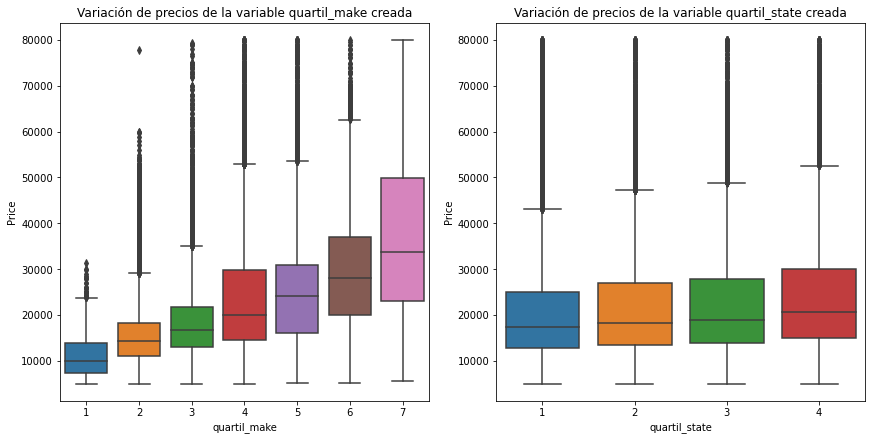

In [87]:
#Variación nuevas variables categóricas creadas
f, ax = plt.subplots(1,2, sharex=False,sharey=False,figsize=(12,6),constrained_layout=True,)

sn.boxplot(ax=ax[0],data=data[['Price', 'quartil_make']],  x='quartil_make', y='Price')
sn.boxplot(ax=ax[1],data=data[['Price', 'quartil_state']],  x='quartil_state', y='Price')
ax[0].set_title('Variación de precios de la variable quartil_make creada')
ax[1].set_title('Variación de precios de la variable quartil_state creada');

Al hacer el agrupamiento de las variables Estado (State) y Marca (Make) se observa que los grupos definidos presentan variaciones en el promedio del precio (en especial la de Make) y al mismo tiempo simplifica el procesamiento de los datos (se reducen las categorías a una variable ordinal con pocos estados lo cual facilita la calibración del modelo = se reduce la cantidad de variables del modelo ya que no se requieren dummis por cada categoría).

* **Categorización de variables contínuas mileage y year**

Dada la presencia de outliers, las variables continúas pueden ser categorizadas mejorando con esto el desempeño de los modelos. En este caso, para las variables Mileage y year se utilizaron cuantiles que permitieron crear 4 y 3 categorías en cada una de las variables respectivamente.

In [58]:
data[data['Mileage']<600000][['Price', 'Year', 'Mileage']].corr()

,Price,Year,Mileage
Price,1.000000,0.479853,-0.476942
Year,0.479853,1.000000,-0.760352
Mileage,-0.476942,-0.760352,1.000000


In [59]:
# Categorizacion de variables numéricas:

# Mileage
data['mileage_cut'] = pd.cut(data.Mileage, bins=[4 , data.Mileage.quantile(0.25) , data.Mileage.quantile(0.50), 
                                                 data.Mileage.quantile(0.75), data.Mileage.max() ], 
                             labels=[1,2,3,4]  )

# Año
data['yaer_cut'] = pd.cut(data.Year, bins=[1996, 2000, 2010, 2018], labels=[1,2,3])


In [60]:
# se pasan a valores enteros:
data['mileage_cut']=data['mileage_cut'].astype('int') 
data['yaer_cut'] = data['yaer_cut'].astype('int')

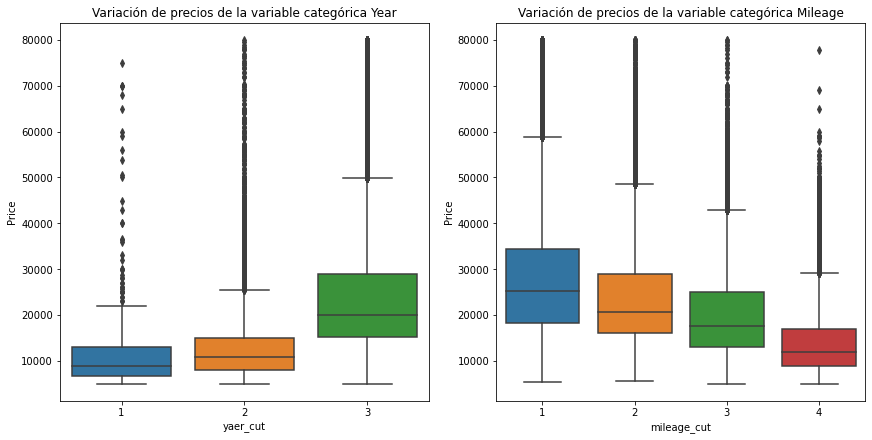

In [85]:
#Variación nuevas variables categóricas creadas
f, ax = plt.subplots(1,2, sharex=False,sharey=False,figsize=(12,6),constrained_layout=True,)

sn.boxplot(ax=ax[0],data=data[['Price', 'yaer_cut']],  x='yaer_cut', y='Price')
sn.boxplot(ax=ax[1],data=data[['Price', 'mileage_cut']],  x='mileage_cut', y='Price')
ax[0].set_title('Variación de precios de la variable categórica Year')
ax[1].set_title('Variación de precios de la variable categórica Mileage');

Se opta por usar las variables de categorícas creadas para **Año, Mileage y los cuantiles de make y State** como variables regresoras (presentan un mejor desempeño en el RMSE, esto se realizó por separado.)

# 1.2. Modelamiento

Particion de los datos en base de train y test:

In [34]:
# Train
x = data[['Year', 'Mileage', 'quartil_make','quartil_state']].iloc[:500000]
y = data['Price'].iloc[:500000]

In [36]:
import seaborn as sn
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score as cvs
import sklearn


###### Prueba inicial con Random Forest sin calibrar

In [37]:
%%time

# Modelo usando únicamente ['Year', 'mileage_cut'] como variables regresoras

modelo_rfr = rfr()
res_2  = np.sqrt(abs(cvs(modelo_rfr, x,y, cv=4, scoring='neg_mean_squared_error')))

# [10879.77414699, 10702.09670534, 10763.2634908 , 10602.23985206]

Wall time: 6min 25s


In [38]:
np.mean(res_2)

8895.496741194984

## 1.2.1. Calibración ADABOOST

In [39]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

* **Calibración**:
 Para modelos con el algoritmo adaboost se determinó calibrar los parámetros "tasa de aprendizaje" y "cantidad de árboles". Esto con el objetivo de tener un algoritmo con mejor poder de predicción. Para este caso utilizamos una grilla de manera que se pudiera hacer la calibración en simultánea con todas las combinaciones de las alternativas planteadas. Para tasa de aprendizaje se utilizaron: 0.001, 0.1, 0.5 y 1. Para cantidad de árboles se utilizaron: 50,100 y 200 árboles. Los resultados se muestran a continuación.

In [40]:
%%time

param_grid_ad = {'learning_rate': [0.001,0.1, 0.5, 1.0], 'n_estimators':[50, 100,200]}
cv=4
model_ad = AdaBoostRegressor()
grid_search = GridSearchCV(estimator = model_ad, param_grid = param_grid_ad,cv = cv)
grid_search.fit(x, y)

Wall time: 33min 35s


GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [41]:
learning_rate=grid_search.best_params_['learning_rate']
n_estimators=grid_search.best_params_['n_estimators']

In [42]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

* Implementación del modelo y desempeño mediante CV manual:

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean
kf=KFold(n_splits=10)

In [44]:
#Función para calular el MSE dada cierta partición del set de datos.
def get_MSE(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return mean_squared_error(y_test, model.predict(X_test))

In [45]:
MSE_ad=[]
modelo_ad =AdaBoostRegressor(n_estimators= n_estimators,learning_rate=learning_rate)
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test=x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]
    MSE_ad.append(get_MSE(modelo_ad,X_train, X_test, y_train, y_test))
ad_RMSE=np.sqrt(mean(MSE_ad))

In [46]:
print(f"RMSE de modelo Adaboost calibrado: {ad_RMSE}")

RMSE de modelo Adaboost calibrado: 8173.47846700392


El modelo de Adaboost tiene un desempeño de **8173** en CV de 10 folds

## 1.2.2. Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

* **Calibración:**
Para modelas con el algoritmo random forest se determinó calibrar los parámetros "profundidad" y "cantidad de árboles" y "máxima cantidad de variables en cada partición". Esto con el objetivo de tener un algoritmo con mejor poder de predicción. Para este caso utilizamos una grilla de manera que se pudiera hacer la calibración en simultánea con toddas las combinaciones de las alternativas planteadas. Para profundidad se utilizaron: 2 y 4. Para cantidad de árboles se utilizaron: 50,100 y 200 árboles y para máxima cantidad de varibales en cada partición 2 y3. Los resultados se muestran a continuación.

In [54]:
%%time

param_grid_rf = {'max_depth': [2,4],'max_features': [2,3,4],'n_estimators':[50,100,200]}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf,cv = 4, n_jobs = -1, verbose = 2)
grid_search_rf.fit(x, y) 

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.4min finished


Wall time: 7min 20s


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'max_features': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [55]:
max_depth=grid_search_rf.best_params_['max_depth']
max_features=grid_search_rf.best_params_['max_features']
n_estimators=grid_search_rf.best_params_['n_estimators']
print((grid_search_rf.best_params_)) 

{'max_depth': 4, 'max_features': 3, 'n_estimators': 200}


* Implementación del modelo y desempeño mediante CV manual:

In [56]:
MSE_rf=[]
modelo_rf = RandomForestRegressor(bootstrap= True,n_estimators =n_estimators,max_depth=max_depth,
                                   max_features =max_features,random_state = 123)
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test=x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]
    MSE_rf.append(get_MSE(modelo_rf,X_train, X_test, y_train, y_test))
rf_RMSE=np.sqrt(mean(MSE_rf))
rf_RMSE

7996.91524434551

Random forest mejor que que Adaboost

## 1.2.3. XGBOOST

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

Para modelos con el algoritmo XGBOOST se determinó calibrar los parámetros "máxima cantidad de variables en cada partición", "tasa de aprendizaje" y "cantidad de árboles". Esto con el objetivo de tener un algoritmo con mejor poder de predicción. Para este caso se hizo la calibración de manera independiente sobre cada hiperparámetro. Para tasa de aprendizaje se utilizaron: 0.001, 0.1, 0.5 y 1. Para cantidad de árboles se utilizaron: 50,100 y 200 árboles. Para máxima cantidad de variables en cada partición se utilizaron 2, 3 y 4. Los resultados se muestran a continuación.

* **Calibración MAX_FEATURES:**

In [58]:
%%time

# CALIBRACIÓN MAX_FEATURES:

max_features_range=[2,3,4]

cv_scores  = []

for max_features in max_features_range:
        modelo = GradientBoostingRegressor(
                    max_features = max_features,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring="neg_mean_squared_log_error",
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Wall time: 4min 34s


Valor óptimo de max_features: 4


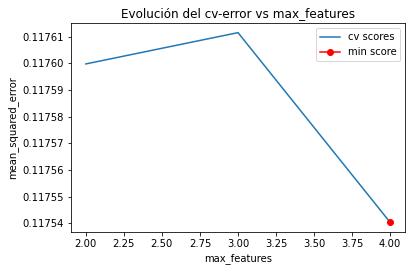

In [59]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs max_features")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

* **Calibración LEARNING RATE**

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
# CALIBRACIÓN LEARNING RATE:

learning_rate_range=[0.001,0.1,0.5, 1]
cv_scores  = []

for lr in learning_rate_range:
        modelo = GradientBoostingRegressor(
                    learning_rate = lr,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Valor óptimo de learning_rate: 0.5


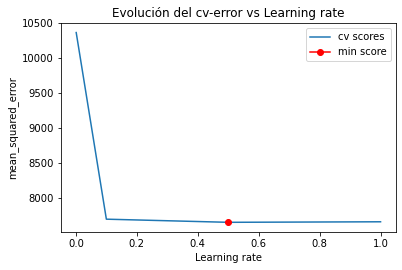

In [62]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(learning_rate_range, cv_scores, label="cv scores")
ax.plot(learning_rate_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("Learning rate")
ax.set_title("Evolución del cv-error vs Learning rate")
plt.legend();
print(f"Valor óptimo de learning_rate: {learning_rate_range[np.argmin(cv_scores)]}")

* **Calibración N_ESTIMATORS**

In [63]:
# CALIBRACIÓN NÚMERO DE ESTIMADORES:

n_estimadores_range=[50, 100, 200]
cv_scores  = []
for n_est in n_estimadores_range:
        modelo = GradientBoostingRegressor(
                    n_estimators = n_est,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Valor óptimo de max_features: 200


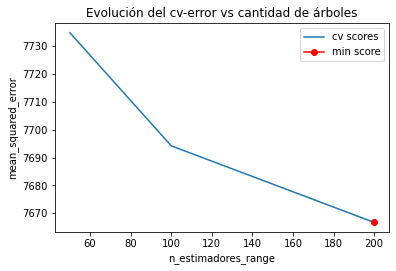

In [64]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(n_estimadores_range, cv_scores, label="cv scores")
ax.plot(n_estimadores_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("n_estimadores_range")
ax.set_title("Evolución del cv-error vs cantidad de árboles")
plt.legend();
print(f"Valor óptimo de max_features: {n_estimadores_range[np.argmin(cv_scores)]}")

* Implementación del modelo y desempeño mediante CV manual:

In [65]:
MSE_gb=[]
modelo_gb = GradientBoostingRegressor(n_estimators = 200, learning_rate =0.5,max_features =4, random_state = 123)
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test=x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]
    MSE_gb.append(get_MSE(modelo_gb,X_train, X_test, y_train, y_test))
gb_RMSE=np.sqrt(mean(MSE_gb))

In [66]:
print(f"RMSE de modelo XGBoost calibrado: {gb_RMSE}")

RMSE de modelo XGBoost calibrado: 7638.838024535112


## 1.2.4. Selección mejor modelo

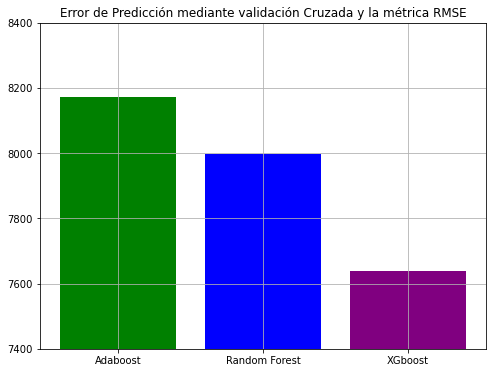

In [69]:
modelos=["Adaboost","Random Forest", "XGboost"]
res_modelos=[ad_RMSE,rf_RMSE,gb_RMSE]
fig = plt.figure(figsize=(8,6))
New_Colors = ['green','blue','purple']
plt.bar(modelos,res_modelos,color=New_Colors)
plt.title("Error de Predicción mediante validación Cruzada y la métrica RMSE")
plt.ylim(7400,8400)
plt.grid(True)
plt.show()

XGBOOST es el modelo con menor error de predicción, por lo tanto este modelo con los respectivos hiperparámetros de calibración será el utilizado en la API.

El modelo final (Gradient Boosting) usa como variable de entrada: Kilometráje, Año, Marca, Estado

# 2. Exercise P2.2 (50%)

Se creaó la API y como resultado a continuación se muestra su funcionamiento

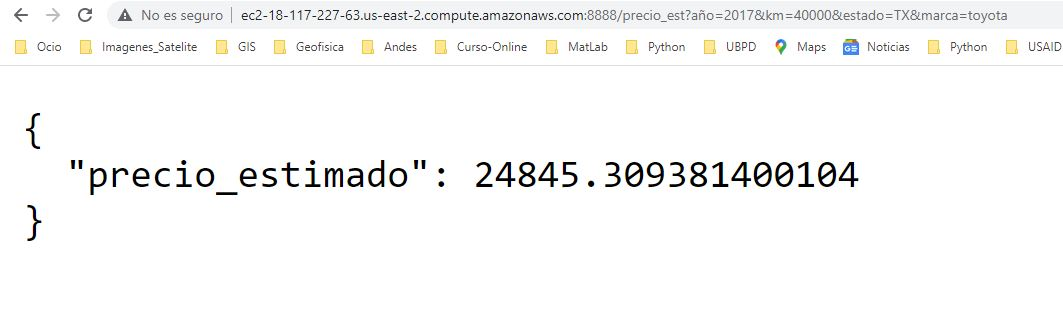